In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Use the linear model y = 2x +ε with zero-mean Gaussian noise ε∼ N(0, 1) to generate 20 data points with (equal spacing) x ∈ [−3, 3].

In [2]:
# split data to trainning set and testing set
def split_train_test(x, y, test_size=5):
    return x[: len(x) - 5], x[len(x) - 5 :], y[: len(y) - 5], y[len(y) - 5:]

# count w_lin without regularization
def count_W(x_train, y_train):
    return np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), x_train.T), y_train)

# count errors
def count_error(x_train, y_train, W):
    return 1 / x_train.shape[0] * np.linalg.norm(np.dot(x_train, W) - y_train)
    
# count cross validation errors - k_fold
def cross_validation_fold(x_train, y_train, K=5):
    num_val = len(x_train) // K
    errors = []
    
    for i in range(K):
        val_data = x_train[i * num_val: (i + 1) * num_val]
        val_target = y_train[i * num_val: (i + 1) * num_val]
        
        train_data = np.concatenate([x_train[: i * num_val], x_train[(i + 1) * num_val:]], axis=0)
        train_target = np.concatenate([y_train[: i * num_val], y_train[(i + 1) * num_val:]], axis=0)
        
        w = count_W(train_data, train_target)
        errors.append(count_error(val_data, val_target, w))
    
    return sum(errors) / len(errors)

# count cross validation errors - leave one out
def cross_validation_leave_one_out(x_train, y_train):
    errors = []
    
    for i in range(0, len(x_train)):
        val_data = x_train[i]
        val_target = y_train[i]
        
        train_data = np.concatenate([x_train[: i], x_train[(i + 1):]], axis=0)
        train_target = np.concatenate([y_train[: i], y_train[(i + 1):]], axis=0)
        
        w = count_W(train_data, train_target)
        errors.append(count_error(val_data, val_target, w))
    
    return sum(errors) / len(errors)

#### (a) Perform linear regression. 20 data points are split into 15 training samples and 5 testing samples (75% for training and 25% for testing). Show the fitting plots of the training error, cross-validation errors for both leave-one-out and five-fold, and testing errors.

In [3]:
X = np.linspace(-3, 3, num=20).reshape((20, 1))
Y = 2 * X + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
cross_validation_error_leave_one_out = cross_validation_leave_one_out(x_train, y_train)
testing_errors = count_error(x_test, y_test, W)

training_errors:  0.13186567141599354
cross_validation_error_fold:  0.28465730446000853
cross_validation_error_leave_one_out:  0.42538469603675183
testing_errors:  0.5124331344321073


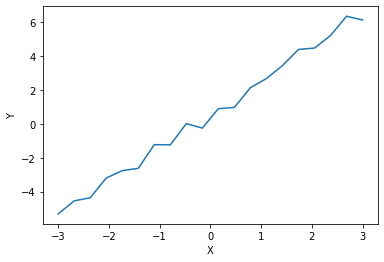

In [4]:
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('cross_validation_error_leave_one_out: ', cross_validation_error_leave_one_out)
print('testing_errors: ', testing_errors)

#### (b) Perform polynomial regression with degree 5, 10 and 14, respectively. For each case, show the fitting plots of the training error, crossvalidation errors (both leave-one-out and five-fold) and testing errors.

In [5]:
# degree 5

X = np.linspace(-3, 3, num=20).reshape((20, 1))
Y = 2 * (X ** 5) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
cross_validation_error_leave_one_out = cross_validation_leave_one_out(x_train, y_train)
testing_errors = count_error(x_test, y_test, W)

training_errors:  24.190064425836336
cross_validation_error_fold:  68.34656476351259
cross_validation_error_leave_one_out:  83.60128287649528
testing_errors:  60.49786787519701


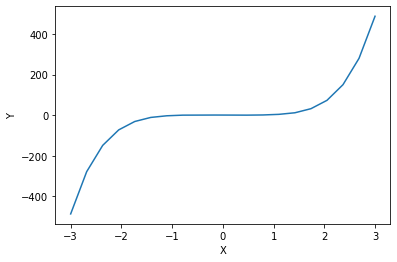

In [6]:
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('cross_validation_error_leave_one_out: ', cross_validation_error_leave_one_out)
print('testing_errors: ', testing_errors)

In [7]:
# degree 10

X = np.linspace(-3, 3, num=20).reshape((20, 1))
Y = 2 * (X ** 10) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
cross_validation_error_leave_one_out = cross_validation_leave_one_out(x_train, y_train)
testing_errors = count_error(x_test, y_test, W)

training_errors:  6364.306618227907
cross_validation_error_fold:  15315.836261447854
cross_validation_error_leave_one_out:  19399.517832966518
testing_errors:  36646.68136161435


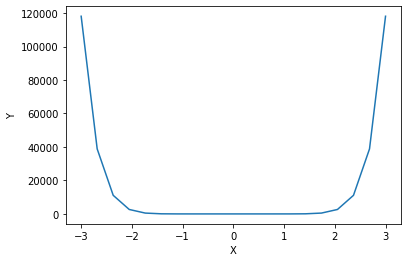

In [8]:
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('cross_validation_error_leave_one_out: ', cross_validation_error_leave_one_out)
print('testing_errors: ', testing_errors)

In [9]:
# degree 14

X = np.linspace(-3, 3, num=20).reshape((20, 1))
Y = 2 * (X ** 14) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
cross_validation_error_leave_one_out = cross_validation_leave_one_out(x_train, y_train)
testing_errors = count_error(x_test, y_test, W)

training_errors:  528102.6131532647
cross_validation_error_fold:  1167028.5099762217
cross_validation_error_leave_one_out:  1553535.5891096068
testing_errors:  2736836.2095447215


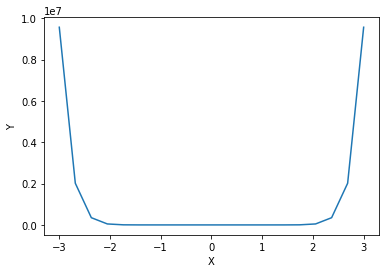

In [10]:
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('cross_validation_error_leave_one_out: ', cross_validation_error_leave_one_out)
print('testing_errors: ', testing_errors)

#### (c) Generate data using y = sin(2πx) +ε with the noise ε∼ N(0, 0.04) and (equal spacing) x ∈ [0, 1]. Show the fitting plots of the training error, cross-validation errors for both leave-one-out and five-fold, and testing errors via polynomial regression with degree 5, 10 and 14.

In [11]:
X = np.linspace(0, 1, num=20).reshape((20, 1))
Y = np.sin(2 * np.pi * X) + np.random.uniform(0, 0.04, (20, 1))

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
cross_validation_error_leave_one_out = cross_validation_leave_one_out(x_train, y_train)
testing_errors = count_error(x_test, y_test, W)

training_errors:  0.18214821051468782
cross_validation_error_fold:  0.4833717166761108
cross_validation_error_leave_one_out:  0.6663959010748589
testing_errors:  0.22771776564815172


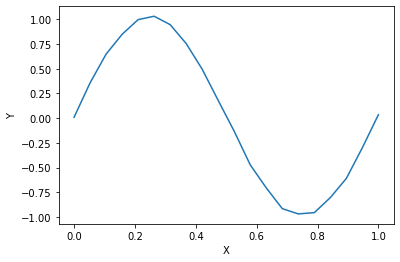

In [12]:
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('cross_validation_error_leave_one_out: ', cross_validation_error_leave_one_out)
print('testing_errors: ', testing_errors)

#### (d) Consider the model in (b) with degree 14 via varying the number training data points m, say, m = 60, 160, 320. Show the five-fold crossvalidation errors, testing error and the fitting plots with 75% for training and 25% for testing.

training_errors:  197615.98332957292
cross_validation_error_fold:  397419.27581029624
testing_errors:  2898480.190356532


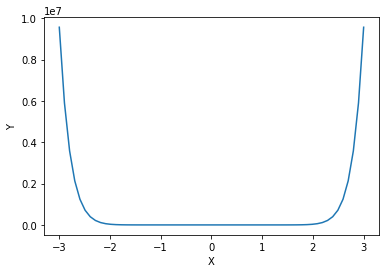

In [13]:
# degree 14 
# m = 60

X = np.linspace(-3, 3, num=60).reshape((60, 1))
Y = 2 * (X ** 14) + np.random.rand(60, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)

training_errors:  115793.70201554765
cross_validation_error_fold:  231460.725953252
testing_errors:  3474848.6891555004


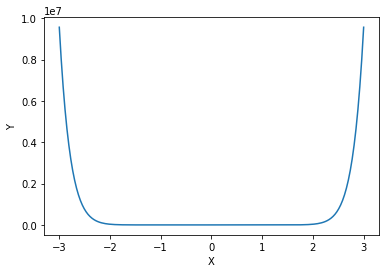

In [14]:
# degree 14 
# m = 160

X = np.linspace(-3, 3, num=160).reshape((160, 1))
Y = 2 * (X ** 14) + np.random.rand(160, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)

training_errors:  87171.15094857226
cross_validation_error_fold:  170594.01076204557
testing_errors:  3810837.588148089


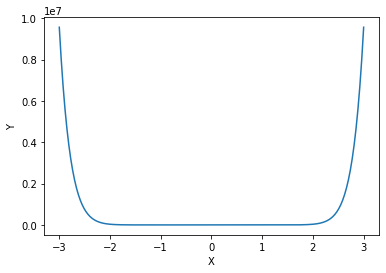

In [15]:
# degree 14 
# m = 320

X = np.linspace(-3, 3, num=320).reshape((320, 1))
Y = 2 * (X ** 14) + np.random.rand(320, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = count_W(x_train, y_train)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)

#### (e) Consider again the model in (b) with degree 14 via regularization:
#### Compare the results derived by setting λ = 0, 0.001/m , 1/m, 1000/m , where m = 20 is the number of data points (with x = 0, 1/(m−1) , 2/(m−1), . . . , 1). Show the five-fold cross-validation errors, testing errors and the fitting plots with regularization using the following 

In [16]:
def compute_W_with_regularization(x_train, y_train, lambd):
    return np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lambd), x_train.T), y_train)

training_errors:  0.10878770229068428
cross_validation_error_fold:  0.2416487528374784
testing_errors:  0.3170313697423862


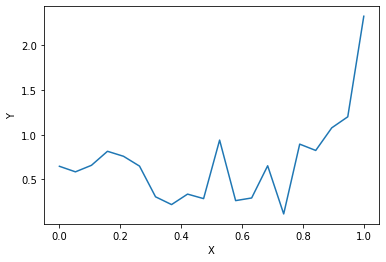

In [17]:
# λ = 0

X = np.linspace(0, 1, num=20).reshape((20, 1))
Y = 2 * (X ** 14) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = compute_W_with_regularization(x_train, y_train, lambd=0)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)

training_errors:  0.11067432091217229
cross_validation_error_fold:  0.24671708070912293
testing_errors:  0.2590358505155721


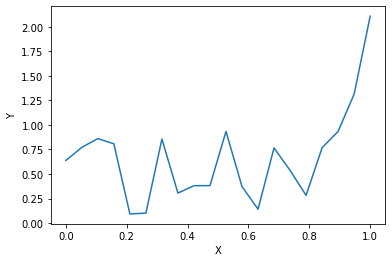

In [18]:
# λ = 0.001/m

X = np.linspace(0, 1, num=20).reshape((20, 1))
Y = 2 * (X ** 14) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = compute_W_with_regularization(x_train, y_train, lambd=0.001/20)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)

training_errors:  0.12029354747706436
cross_validation_error_fold:  0.19996747612329802
testing_errors:  0.6765131771634407


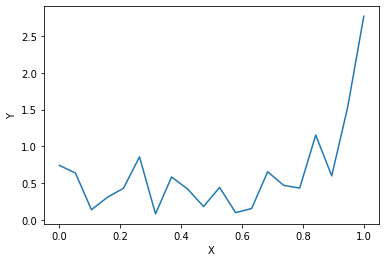

In [19]:
# λ = 1000/m

X = np.linspace(0, 1, num=20).reshape((20, 1))
Y = 2 * (X ** 14) + np.random.rand(20, 1)

x_train, x_test, y_train, y_test = split_train_test(X, Y)

W = compute_W_with_regularization(x_train, y_train, lambd=1000/20)
training_errors = count_error(x_train, y_train, W)
cross_validation_error_fold = cross_validation_fold(x_train, y_train, K=5)
testing_errors = count_error(x_test, y_test, W)

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
print('training_errors: ', training_errors)
print('cross_validation_error_fold: ', cross_validation_error_fold)
print('testing_errors: ', testing_errors)